# DLTHON

## DKTC (Dataset of Korean Threatening Conversations)

- 텍스트 다중분류 프로젝트

## 데이터셋 정보

train.csv

    1. idx = 인덱스
    2. class = 0~4
        class 0; 협박 대화
        class 1; 갈취 대화
        class 2; 직장 내 괴롭힘 대화
        class 3; 기타 괴롭힘 대화
    3. conversation = \n으로 구분된 멀티턴 텍스트 대화

test.json

    1. t_### = 인덱스
    2. text = 대화

submission.csv

    1. file_name = 인덱스
    2. class = 예측값

## 평가기준
> - 데이터 EDA와 데이터 전처리가 적절하게 이뤄졌는가?
> - Task에 알맞게 적절한 모델을 찾아보고 선정했는가?
> - 성능향상을 위해 논리적으로 접근했는가?
> - 결과 도출을 위해 여러가지 시도를 진행했는가?
> - 도출된 결론에 충분한 설득력이 있는가?
> - 적절한 metric을 설정하고 그 사용 근거 및 결과를 분석하였는가?
> - 발표가 매끄럽게 진행되었고 발표시간을 준수하였는지? (발표 10분-15분)

## TO-DO-LIST
- 일반 대화 데이터셋 만들어야함 (800-1000개정도)
- ppt 제작
- 평가지표 : f1-score

## EDA


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme(style="darkgrid")

In [ ]:
import os
import pandas as pd

train_data_path ="./data/train.csv"
df = pd.read_csv(train_data_path)
df.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [ ]:
df.shape

(3950, 3)

## 데이터 전처리

In [ ]:
!pip install soynlp

In [ ]:
import re
# import emoji
from soynlp.normalizer import repeat_normalize

In [ ]:
def clean(x):
    # emojis = ''.join(emoji.UNICODE_EMOJI.keys())
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [ ]:
df['cleaned'] = df.conversation.apply(lambda x: clean(x))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit, transform 메소드를 통한 레이블 인코딩
encoder.fit(df['class'])

df["label"] = encoder.transform(df['class'])

In [ ]:
df

,idx,class,conversation,cleaned,label
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...,3
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동경찰서입니다. 9시 40분 마트에 폭발물을 설치할거다. 네? 똑바로 들어 한번만...,3
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. 그만해. 니들 놀리는거 재미없...,1
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어이 거기 예?? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아보인다? 얘 돈...,0
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,0
...,...,...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...,준하야 넌 대가리가 왜이렇게 크냐? 내 머리가 뭐. 밥먹으면 대가리만 크냐 너는? ...,1
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내 예.? ...,0
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지. 왜 그래. 들리겠어....,2
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...,누구맘대로 여기서 장사하래? 이게 무슨일입니까? 남의 구역에서 장사하려면 자릿세를 ...,0


## BERT

In [ ]:
dataset = df[['cleaned', 'label']]

In [ ]:
dataset.sample(n=10)

,cleaned,label
2661,00씨 요즘 얼굴 좋아보이네 아. 감사합니다 00씨는 성격이 참 좋은 것 같아 눈치...,2
3091,남자친구를 사겨? 너 학생이 공부는 안하고 아 뭐가 야 그 새끼 어디살어 다리를 확...,3
2430,어이 지금 어깨 부딪혀 놓고 미안하다 안해? 아니 길이 좁아서 그랬어요 살짝 부딪혔...,0
1737,다들 점심 먹으러 가시죠. 아영씨는 따로 드실거죠? 아 저도 오늘 나가서 먹으려구요...,2
1474,얘 너. 여기 와봐. 네? 저요? 그래 너. 내가 집에 갈 버스비가 없어서 그러는데...,0
3092,중요한 전화 올 수도 있으니까 점심시간에 사무실 대기 좀 해줘요. 그러면 제 점심은...,2
3010,엇 기사양반 나 여기서 내려줘 여기는 정류장 아닙니다 아니 내가나이먹어서 걷기가 힘...,1
3340,이봐 땡땡씨 이거 모야? 말씀하신 자료 피피티 인데요 아니 누가 그걸 몰라? 왜 보...,2
1154,너 홍길동이랑 사귄다며 응 맞아 니가 어울린다고 생각해 웃겨 정말 왜 그래 내가 홍...,1
392,병신이 아이스크림 먹게 돼 있냐? 난 먹으면 안 돼? 그만 좀 해. 당연히 안 되지...,1


In [ ]:
max_seq_len = 0
len_64_128 = 0
len_128_256 = 0

mylist = [0 for i in range(10000)]
for index, value in dataset['cleaned'].items():
    mylist[len(value)] += 1
    max_seq_len = max(max_seq_len, len(value))

    if len(value) >= 64 and len(value) < 128:
        len_64_128 += 1
    elif len(value) >= 128 and len(value) < 256:
        len_128_256 += 1

print(f'가장 긴 문장 길이: {max_seq_len}')
print(f'64과 128 사이 길이 문장 개수: {len_64_128}')
print(f'128과 256 사이 길이 문장 개수: {len_128_256}')

가장 긴 문장 길이: 874
64과 128 사이 길이 문장 개수: 462
128과 256 사이 길이 문장 개수: 2344


In [ ]:
import numpy as np

In [ ]:
from tqdm import tqdm, trange

from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','으로','자','에','와','한','하다','하']
okt = Okt()

In [ ]:
def preprocessing(data):
    data.drop_duplicates(subset = ['cleaned'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

    data['cleaned'] = data['cleaned'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
    data['cleaned'] = data['cleaned'].str.replace('^ +', "") # 공백은 empty 값으로 변경
    data['cleaned'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
    data = data.dropna(how='any') # Null 값 제거
    print('전처리 후 테스트용 샘플의 개수 :',len(data))

    X = []
    for sentence in tqdm(data['cleaned']):
        temp_X = okt.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X.append(temp_X)

    return X, data

In [ ]:
X, data = preprocessing(dataset)

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_373/3734027533.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned'] = data['cleaned'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/tmp/ipykernel_373/3734027533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned'] = data['cleaned'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/tmp/ipykernel_373/3734027533.py:5: FutureWarning: Th

전처리 후 테스트용 샘플의 개수 : 3845


100%|██████████| 3845/3845 [00:50<00:00, 76.04it/s] 


In [ ]:
data

,cleaned,label
0,지금 너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽...,3
1,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 더 얘기한...,3
2,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,1
3,어이 거기 예 너 말이야 너 이리 오라고 무슨 일 너 옷 좋아보인다 얘 돈 좀 있나...,0
4,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 이 선크림 파는데 한 번 손등에 발...,0
...,...,...
3945,준하야 넌 대가리가 왜이렇게 크냐 내 머리가 뭐 밥먹으면 대가리만 크냐 너는 아니 ...,1
3946,내가 지금 너 아들 김길준 데리고 있어 살리고 싶으면 계좌에 억만 보내 예 선생님 ...,0
3947,나는 씨 같은 사람 보면 참 신기하더라 어떻게 저렇게 살지 왜 그래 들리겠어 들리라...,2
3948,누구맘대로 여기서 장사하래 이게 무슨일입니까 남의 구역에서 장사하려면 자릿세를 내야...,0


In [ ]:
max_seq_len = 800

In [ ]:
from sklearn.model_selection import train_test_split

X = data[data.columns[0]].tolist()
y = data[data.columns[1]].tolist()

# train/validation/test dataset 분할
# train:val:test = 6:2:2
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=0)
# val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, stratify=temp_y, test_size=0.5, random_state=0)

In [ ]:
print(f'train set length: {len(X_train)}')
print(f'valid set length: {len(X_test)}')
print(f'test  set length: {len(y_test)}')

train set length: 3076
valid set length: 769
test  set length: 769


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

print(tokenizer.word_index)

{'내가': 1, '너': 2, '네': 3, '왜': 4, '좀': 5, '야': 6, '아': 7, '나': 8, '다': 9, '죄송합니다': 10, '진짜': 11, '아니': 12, '지금': 13, '그럼': 14, '그냥': 15, '돈': 16, '이': 17, '그래': 18, '내': 19, '안': 20, '제가': 21, '뭐': 22, '무슨': 23, '저': 24, '제발': 25, '이거': 26, '그': 27, '거': 28, '더': 29, '니가': 30, '그렇게': 31, '잘': 32, '우리': 33, '어떻게': 34, '니': 35, '너무': 36, '오늘': 37, '아니야': 38, '못': 39, '정말': 40, '없어': 41, '빨리': 42, '수': 43, '어': 44, '한': 45, '그게': 46, '이렇게': 47, '나도': 48, '너가': 49, '넌': 50, '해': 51, '그건': 52, '난': 53, '응': 54, '있어': 55, '말': 56, '할': 57, '것': 58, '여기': 59, '뭘': 60, '근데': 61, '나한테': 62, '안돼': 63, '일': 64, '이제': 65, '이게': 66, '그런': 67, '당장': 68, '제': 69, '하고': 70, '그래도': 71, '알아': 72, '같이': 73, '돈이': 74, '없어요': 75, '말이': 76, '미안해': 77, '다시': 78, '줄': 79, '그거': 80, '나는': 81, '또': 82, '다른': 83, '알겠습니다': 84, '게': 85, '아닙니다': 86, '거야': 87, '부장님': 88, '내놔': 89, '뭐야': 90, '하면': 91, '있는': 92, '하': 93, '이건': 94, '뭐가': 95, '아니고': 96, '그래서': 97, '누가': 98, '이런': 99, '사람': 100, '싫어': 101, '너는': 102, '많이

In [ ]:
# 등장 빈도수가 3회 미만인 단어들의 분포 확인

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 44445
등장 빈도가 2번 이하인 희귀 단어의 수: 36852
단어 집합에서 희귀 단어의 비율: 82.91596355045561
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 23.930023994690536


In [ ]:
# 등장 빈도수가 2이하인 단어들의 수를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1

vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7594


In [ ]:
# 이를 케라스 토크나이저의 인자로 넘겨 텍스트 시퀀스를 숫자 시퀀스로 변환

tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# 정수 인코딩 결과 확인

print(X_train[:3])

[[6, 752, 1072, 4250, 10, 102, 405, 616, 1364, 4251, 156, 76, 36, 95, 1462, 959, 1138, 5425, 30, 1072, 4252, 197, 145, 29, 31, 435, 310, 213, 1463], [1, 1201, 5426, 77, 198, 155, 13, 3516, 51, 77, 910, 36, 406, 20, 1907, 1, 1736, 815, 1273, 20, 3016, 34, 960, 357, 11, 77, 140, 29, 870, 282, 106, 3517, 18, 61, 39, 5427, 1, 1273, 2333, 3518, 39, 27, 3518, 1596, 3519, 11, 1274, 1, 77, 2090, 229, 51, 1737, 44, 816, 78, 140, 1908, 237, 27, 20, 3016, 1, 5428, 1365, 79, 1909], [13, 68, 518, 34, 18, 5429, 1, 191, 47, 53, 31, 254, 4, 4253, 911, 6, 8, 65, 358, 358, 66, 358, 5429, 1464, 3520, 681, 93, 5430, 2334, 66, 912, 3520, 140, 4254, 5429, 8, 16, 33, 2091, 198, 127, 3521, 190, 15, 141, 1465, 1597, 2622, 4255, 33, 382, 2335, 3017, 132, 201, 26, 9, 48, 15, 213, 18, 1, 3018, 310, 213, 137, 140, 617, 536, 503, 292, 3019, 1202, 4256]]


In [ ]:
# 각 샘플들의 길이를 확인해서 길이가 0인 샘플들의 인덱스 받아오기

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

# 빈 샘플 제거

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

3076
3076


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


대화의 최대 길이 : 170
대화의 평균 길이 : 43.59655396618986


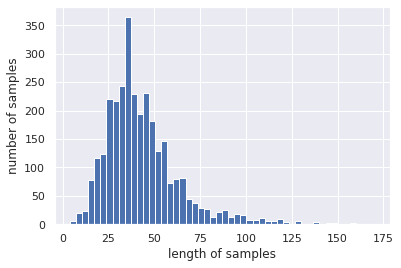

In [ ]:
print('대화의 최대 길이 :',max(len(l) for l in X_train))
print('대화의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show();

In [ ]:
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 100
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 97.52925877763329


In [ ]:
max_len = 120
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 120 이하인 샘플의 비율: 99.05721716514955


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True,
                                                  stratify=y_train, random_state=777)

In [ ]:
# 패키지 준비

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## LSTM 모델

In [ ]:
# 모델 설계

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(4, activation='sigmoid'))

In [ ]:
# 모델 검증

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('lstm_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
# 모델 훈련

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
lstm_history = model.fit(X_train, y_train, epochs=20, batch_size=60, validation_data=(X_val, y_val), callbacks=[es, mc])

Epoch 1/20
41/41 [==============================] - 2s 19ms/step - loss: 1.3196 - acc: 0.4423 - val_loss: 1.0587 - val_acc: 0.6510

Epoch 00001: val_acc improved from -inf to 0.65097, saving model to new_best_model.h5
Epoch 2/20
41/41 [==============================] - 0s 8ms/step - loss: 0.8310 - acc: 0.6866 - val_loss: 0.7976 - val_acc: 0.6688

Epoch 00002: val_acc improved from 0.65097 to 0.66883, saving model to new_best_model.h5
Epoch 3/20
41/41 [==============================] - 0s 9ms/step - loss: 0.4702 - acc: 0.8508 - val_loss: 0.5711 - val_acc: 0.7955

Epoch 00003: val_acc improved from 0.66883 to 0.79545, saving model to new_best_model.h5
Epoch 4/20
41/41 [==============================] - 0s 8ms/step - loss: 0.2907 - acc: 0.9085 - val_loss: 0.7123 - val_acc: 0.7776

Epoch 00004: val_acc did not improve from 0.79545
Epoch 5/20
41/41 [==============================] - 0s 8ms/step - loss: 0.1845 - acc: 0.9484 - val_loss: 0.6005 - val_acc: 0.7938

Epoch 00005: val_acc did not i

In [ ]:
y_test = np.array(y_test)
accr = model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.5799 - acc: 0.8062


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.580
  Accuracy: 0.806


In [ ]:
def draw_graph(history):
    history_dict = history.history
    try:
        acc = history_dict['accuracy']
        val_acc = history_dict['val_accuracy']
    except:
        acc = history_dict['acc']
        val_acc = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc) + 1)

    fig = plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

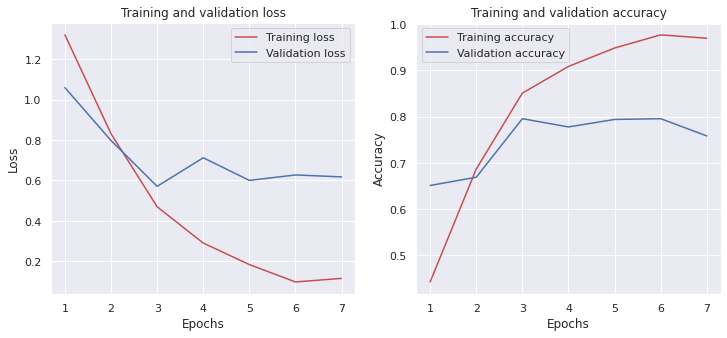

In [ ]:
draw_graph(lstm_history)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
text = tokenizer.sequences_to_texts(X_train)

In [ ]:
text = [t.split(' ') for t in text]

In [ ]:
text[:1]

[['나',
  '이거',
  '좀',
  '부탁할게',
  '네',
  '이거',
  '좀',
  '부탁한다고',
  '이거',
  '제',
  '일이',
  '아닌데',
  '그니깐',
  '부탁한다고',
  '그래도',
  '돕고',
  '살아야지',
  '안그래',
  '네',
  '그래']]

In [ ]:
model = Word2Vec(text, window=5, min_count = 10, workers=1)

In [ ]:
for sim_word in model.wv.most_similar("야"):
    print(sim_word)

('너', 0.9991376996040344)
('그래', 0.9989804625511169)
('응', 0.9989509582519531)
('어', 0.998895525932312)
('진짜', 0.998874306678772)
('안돼', 0.9987132549285889)
('아니야', 0.9985904097557068)
('미안해', 0.998516321182251)
('이거', 0.998467743396759)
('나', 0.998428225517273)


In [ ]:
word_vectors = model.wv
vocabs = list(word_vectors.key_to_index)
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('dktc_w2v') # 모델 저장
# loaded_model = KeyedVectors.load_word2vec_format('dktc_w2v') # 모델 로드

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input dktc_w2v --output dktc_w2v

2024-06-25 02:52:01,243 - word2vec2tensor - INFO - running /opt/conda/lib/python3.9/site-packages/gensim/scripts/word2vec2tensor.py --input dktc_w2v --output dktc_w2v
2024-06-25 02:52:01,243 - keyedvectors - INFO - loading projection weights from dktc_w2v
2024-06-25 02:52:01,339 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (1697, 100) matrix of type float32 from dktc_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-06-25T02:52:01.334708', 'gensim': '4.1.2', 'python': '3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) \n[GCC 9.4.0]', 'platform': 'Linux-5.15.154+-x86_64-with-glibc2.31', 'event': 'load_word2vec_format'}
2024-06-25 02:52:01,463 - word2vec2tensor - INFO - 2D tensor file saved to dktc_w2v_tensor.tsv
2024-06-25 02:52:01,463 - word2vec2tensor - INFO - Tensor metadata file saved to dktc_w2v_metadata.tsv
2024-06-25 02:52:01,463 - word2vec2tensor - INFO - finished running word2vec2tensor.py


## 1D CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.5 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

vocab_size = 10000
word_vector_dim = 300

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(4, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('cnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 256)         196864    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[mc])

Epoch 1/10
77/77 [==============================] - 2s 13ms/step - loss: 1.3722 - acc: 0.3110 - val_loss: 1.2883 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to new_embedding_cnn_best_model.h5
Epoch 2/10
77/77 [==============================] - 0s 6ms/step - loss: 1.1202 - acc: 0.5638 - val_loss: 0.9548 - val_acc: 0.6558

Epoch 00002: val_acc improved from 0.50000 to 0.65584, saving model to new_embedding_cnn_best_model.h5
Epoch 3/10
77/77 [==============================] - 0s 6ms/step - loss: 0.7276 - acc: 0.7557 - val_loss: 0.6230 - val_acc: 0.7646

Epoch 00003: val_acc improved from 0.65584 to 0.76461, saving model to new_embedding_cnn_best_model.h5
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.3718 - acc: 0.8862 - val_loss: 0.5464 - val_acc: 0.8036

Epoch 00004: val_acc improved from 0.76461 to 0.80357, saving model to new_embedding_cnn_best_model.h5
Epoch 5/10
77/77 [==============================] - 0s 6ms/step - 

In [ ]:
predict = model.evaluate(X_test, y_test, verbose=1)
print(predict)

25/25 [==============================] - 0s 2ms/step - loss: 0.8373 - acc: 0.8049
[0.8372843265533447, 0.8049414753913879]


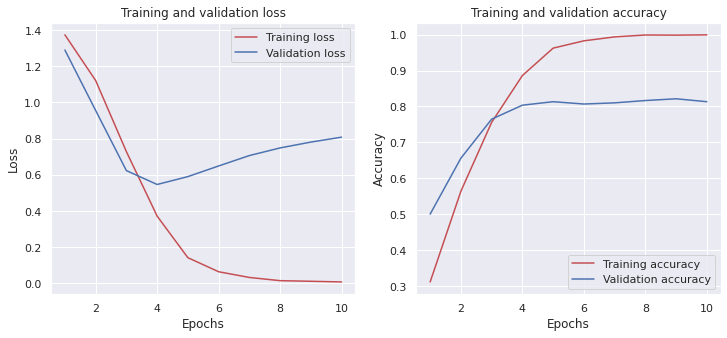

In [ ]:
draw_graph(history)

## Stacked LSTM

In [ ]:
vocab_size = 10000
word_vector_dim = 300

model = Sequential()
model.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(LSTM(units=8, return_sequences = True))
model.add(LSTM(units=16, return_sequences = False))
model.add(Dense(4, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('stacked_lstm_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 8)           9888      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                1600      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
Total params: 3,011,556
Trainable params: 3,011,556
Non-trainable params: 0
_________________________________________________________________


In [ ]:
stacked_lstm_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[es, mc])

Epoch 1/20
77/77 [==============================] - 7s 39ms/step - loss: 1.2075 - accuracy: 0.4931 - val_loss: 0.8750 - val_accuracy: 0.6737

Epoch 00001: val_accuracy improved from -inf to 0.67370, saving model to embedding_stacked_lstm_best_model.h5
Epoch 2/20
77/77 [==============================] - 1s 11ms/step - loss: 0.5042 - accuracy: 0.8695 - val_loss: 0.6667 - val_accuracy: 0.7484

Epoch 00002: val_accuracy improved from 0.67370 to 0.74838, saving model to embedding_stacked_lstm_best_model.h5
Epoch 3/20
77/77 [==============================] - 1s 10ms/step - loss: 0.1911 - accuracy: 0.9581 - val_loss: 0.7160 - val_accuracy: 0.7338

Epoch 00003: val_accuracy did not improve from 0.74838
Epoch 4/20
77/77 [==============================] - 1s 10ms/step - loss: 0.0819 - accuracy: 0.9862 - val_loss: 0.7603 - val_accuracy: 0.7581

Epoch 00004: val_accuracy improved from 0.74838 to 0.75812, saving model to embedding_stacked_lstm_best_model.h5
Epoch 5/20
77/77 [=======================

In [ ]:
predict = model.evaluate(X_test, y_test, verbose=1)
print(predict)

25/25 [==============================] - 0s 6ms/step - loss: 0.7438 - accuracy: 0.7802
[0.743799090385437, 0.7802340984344482]


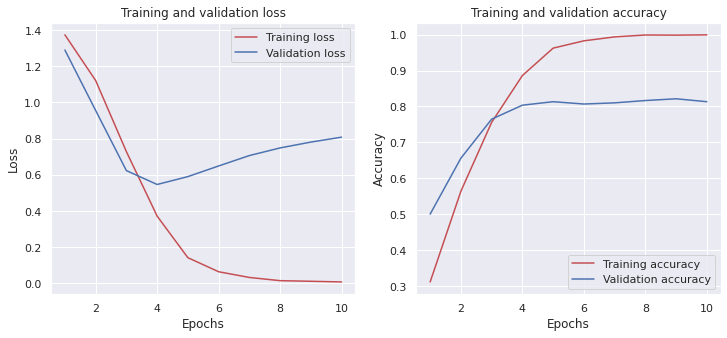

In [ ]:
draw_graph(history)

## Preprocessing

일반대화 예시

```json
{
	"id": {
		"text": "이거 들어봐 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래"
	}
}
```

In [ ]:
import json
with open('./data/test.json') as f:
    test_data = json.load(f)

test_data = pd.DataFrame(test_data).T
test_data.reset_index(drop=True)

,text
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...
495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...
497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...
498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...


In [ ]:
test = tokenizer.texts_to_sequences(test_data.text.tolist())
test = pad_sequences(test, maxlen = max_len)
pred = model.predict(test)

pred_df = pd.DataFrame(pred, columns=encoder.classes_)

pred_df['label'] = np.argmax(pred, axis=1)

pred_df['class'] = pred_df.label.apply(lambda x: encoder.classes_[x])

pred_df.to_csv('stacked_lstm_pred.csv', index=False)

In [ ]:
def prediction(test_data, model, filename):
    test = tokenizer.texts_to_sequences(test_data.text.tolist())
    test = pad_sequences(test, maxlen = max_len)
    pred = model.predict(test)

    pred_df = pd.DataFrame(pred, columns=encoder.classes_)
    pred_df['label'] = np.argmax(pred, axis=1)
    pred_df['class'] = pred_df.label.apply(lambda x: encoder.classes_[x])

    filename = f'{filename}.csv'
    pred_df.to_csv(filename, index=False)

In [ ]:
cnn_model = load_model('cnn_best_model.h5')
lstm_model = load_model('lstm_best_model.h5')
stacked_lstm_model = load_model('stacked_lstm_best_model.h5')

print("\ncnn 모델 테스트 정확도: %.4f" % (cnn_model.evaluate(X_test, y_test)[1]))
print("\nlstm 모델 테스트 정확도: %.4f" % (lstm_model.evaluate(X_test, y_test)[1]))
print("\nstacked lstm 모델 테스트 정확도: %.4f" % (stacked_lstm_model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 0s 3ms/step - loss: 0.8077 - acc: 0.8036

cnn 모델 테스트 정확도: 0.8036
25/25 [==============================] - 0s 5ms/step - loss: 0.5740 - acc: 0.8010

lstm 모델 테스트 정확도: 0.8010
25/25 [==============================] - 1s 6ms/step - loss: 0.7438 - accuracy: 0.7802

stacked lstm 모델 테스트 정확도: 0.7802


In [ ]:
prediction(test_data, cnn_model,'cnn_model_pred')
prediction(test_data, lstm_model,'lstm_model_pred')
prediction(test_data, stacked_lstm_model,'stacked_lstm_model_pred')